Logistic Regression:

Importing packages and data pre-processing

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

df = pd.read_csv("income.csv")
print('Number of rows: ',len(df))
df.info()
# Check and drop nas if any
df.isna().sum()
df = df.dropna() # dropped na rows

Number of rows:  26215
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26215 entries, 0 to 26214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          26215 non-null  int64 
 1   age             26215 non-null  int64 
 2   workclass       24819 non-null  object
 3   education       26215 non-null  object
 4   marital-status  26215 non-null  object
 5   occupation      24814 non-null  object
 6   relationship    26215 non-null  object
 7   race            26215 non-null  object
 8   sex             26215 non-null  object
 9   hours-per-week  26215 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


null counts:

workclass: 1396

Occupation: 1401

Total row count: 26,215

Income is binary: 1 is > 50k, 0 is < 50k

Check for duplicates and drop if necessary

In [ ]:
df.duplicated().any()
df = df.drop_duplicates()
print(len(df))
df.info()
df.describe()

21537
<class 'pandas.core.frame.DataFrame'>
Index: 21537 entries, 0 to 26214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          21537 non-null  int64 
 1   age             21537 non-null  int64 
 2   workclass       21537 non-null  object
 3   education       21537 non-null  object
 4   marital-status  21537 non-null  object
 5   occupation      21537 non-null  object
 6   relationship    21537 non-null  object
 7   race            21537 non-null  object
 8   sex             21537 non-null  object
 9   hours-per-week  21537 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.8+ MB


,income,age,hours-per-week
count,21537.000000,21537.000000,21537.000000
mean,0.298881,39.407624,41.478015
std,0.457778,13.203134,12.501092
min,0.000000,17.000000,1.000000
25%,0.000000,29.000000,40.000000
50%,0.000000,38.000000,40.000000
75%,1.000000,48.000000,47.000000
max,1.000000,90.000000,99.000000


Change categorical values:

In [ ]:
df['education'] = df['education'].replace({'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13, 'Masters': 14, 'Prof-school': 15, 'Doctorate': 16})
display(df['education'].unique())
df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})
display(df['sex'].unique())
# Drop "Relationship" column
df = df.drop('relationship', axis=1)
# Dummy code ("drop_true" suggested to be added by Gemini)
categorical_cols = ["workclass", "marital-status", "occupation", "race"]
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)
df_dummies.describe()

/tmp/ipython-input-3534416492.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13, 'Masters': 14, 'Prof-school': 15, 'Doctorate': 16})


array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  8,  6,  3,  2,  1])

/tmp/ipython-input-3534416492.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})


array([0, 1])

,income,age,education,sex,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White
count,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,...,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000,21537.000000
mean,0.298881,39.407624,10.236337,0.325626,41.478015,0.076891,0.701490,0.044157,0.092817,0.047407,...,0.005479,0.149139,0.024237,0.120583,0.032131,0.052746,0.036449,0.100339,0.009333,0.843247
std,0.457778,13.203134,2.640455,0.468619,12.501092,0.266424,0.457615,0.205448,0.290183,0.212512,...,0.073819,0.356233,0.153789,0.325650,0.176351,0.223532,0.187409,0.300458,0.096157,0.363577
min,0.000000,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,9.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,38.000000,10.000000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,48.000000,13.000000,1.000000,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,90.000000,16.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting and normalising:

In [ ]:
# Splitting the dataset
x = df_dummies.drop('income', axis=1)
y = df_dummies['income'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [ ]:
# normalising
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing data
x_test_norm = norm.transform(x_test)

Logistic Regression and SVM models:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# logistic regression model
model = LogisticRegression()
model.fit(x_train_norm, y_train)
accuracy = model.score(x_test_norm, y_test)
print("Logistic Regression Accuracy:", accuracy)

# Support Vector Classification
model = SVC()
model.fit(x_train_norm, y_train)
accuracy = model.score(x_test_norm, y_test)
print("SVM Accuracy:", accuracy)

Logistic Regression Accuracy: 0.807799442896936
SVM Accuracy: 0.8129062209842154


10-fold Cross Validation:

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=5)

from sklearn.model_selection import cross_val_score

model = LogisticRegression()
results = cross_val_score(model, x_train_norm, y_train, cv=kfold)
print("Average Accuracy of LR:",results.mean())

model = SVC()
results = cross_val_score(model, x_train_norm, y_train, cv=kfold)
print("Average Accuracy of SVM:",results.mean())

Average Accuracy of LR: 0.8021975463185465
Average Accuracy of SVM: 0.802506292275603


Hyper-parameter Tuning:

In [ ]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

grid_params_lr = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 30, 50],
    'solver': ['saga', 'liblinear']
}

grid_params_svm = {
    'kernel': ['linear', 'poly'],
    'C': [1,10],
    'degree': [2,3],
    'gamma': ['auto','scale']
}

lr = LogisticRegression(max_iter=1000)
gs_lr_result = GridSearchCV(lr, grid_params_lr, cv=kfold, n_jobs=-1).fit(x_train_norm, y_train) # n_jobs=-1 suggested by Gemini to reduce runtime

svm = SVC(max_iter=-1)
gs_svm_result = GridSearchCV(svm, grid_params_svm, cv=kfold, n_jobs=-1).fit(x_train_norm, y_train) # n_jobs=-1 suggested by Gemini to reduce runtime

print("Best score for Logistic Regression:", gs_lr_result.best_score_)
print("Best parameters for Logistic Regression:", gs_lr_result.best_params_)
print("Best score for SVM:", gs_svm_result.best_score_)
print("Best parameters for SVM:", gs_svm_result.best_params_)

Best score for Logistic Regression: 0.8024038382215892
Best parameters for Logistic Regression: {'C': 30, 'penalty': 'l1', 'solver': 'saga'}
Best score for SVM: 0.8069955628080606
Best parameters for SVM: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


Evaluating using the Test Dataset:

In [ ]:
test_accuracy_lr = gs_lr_result.best_estimator_.score(x_test_norm, y_test)
print("Logistic Regression in Test Data:", test_accuracy_lr)

test_accuracy_svm = gs_svm_result.best_estimator_.score(x_test_norm, y_test)
print("SVM in Test Data:", test_accuracy_svm)

Logistic Regression in Test Data: 0.808263695450325
SVM in Test Data: 0.8119777158774373


Clustering:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=15, random_state=5) # n_init=15 suggested by gemnini
kmeans.fit(x_train_norm)
kmeans_cluster_centers = kmeans.cluster_centers_
print('labels:',kmeans.labels_)
print('kmeans.cluster_centers_:',kmeans_cluster_centers)

# data samples in each cluster
kmeans_labels = kmeans.labels_
unique_labels, unique_counts = np.unique(kmeans_labels, return_counts=True)
dict(zip(unique_labels, unique_counts))

labels: [0 0 0 ... 1 1 0]
kmeans.cluster_centers_: [[ 3.63190601e-01  6.62587392e-01  2.61917143e-01  4.30642668e-01
   2.57583637e-01 -2.52020627e-14  1.49072630e-01  3.11319119e-01
   1.56699601e-01  1.56006240e-03  2.11995146e-01  1.61899809e-01
   2.96411856e-02  8.66701335e-04  1.05390882e-01  1.73686947e-01
   6.44825793e-02  1.14404576e-02  1.16137979e-02  6.72560236e-02
   4.46691295e-16  2.36782805e-01  5.70289478e-02  9.27370428e-02
   2.60010400e-02  3.96949211e-02  3.38013521e-02  8.75368348e-02
   5.02686774e-03  8.62021148e-01]
 [ 2.82857494e-01  5.94995348e-01  3.51329514e-01  4.05387761e-01
   1.73472348e-15  1.00000000e+00  1.13867249e-14 -1.74166237e-14
  -4.22578639e-15 -7.26415456e-17  3.55883649e-01  1.86939915e-01
   2.98222418e-02 -6.65700134e-17  1.20758043e-01  1.25459086e-01
   2.27706772e-02  5.18583811e-02  8.14602615e-02  1.21712943e-01
   7.41883355e-03  1.11429411e-01  9.47553989e-03  1.31923020e-01
   3.52578228e-02  5.80285001e-02  3.75348906e-02  1.057

{np.int32(0): np.int64(5769), np.int32(1): np.int64(13614)}

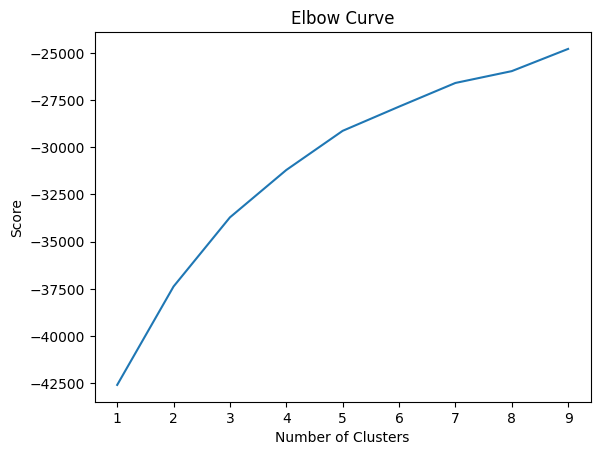

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

num_cluster = range(1, 10)
kmeans_list = [KMeans(n_clusters=i, n_init=15, random_state=5) for i in num_cluster]
scores = [kmeans_list[i].fit(x_train_norm).score(x_train_norm) for i in range(len(kmeans_list))]

plt.plot(num_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Extracting Prototype:

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

closest = pairwise_distances_argmin(kmeans.cluster_centers_, x_train_norm)

df.iloc[closest, :]

,income,age,workclass,education,marital-status,occupation,race,sex,hours-per-week
6946,0,26,Private,13,NotMarried,Sales,White,0,18
10715,0,39,Private,13,Married,Sales,White,0,55


In [ ]:
from sklearn.metrics import accuracy_score

# Predict clusters for the test data
kmeans_test_labels = kmeans.predict(x_test_norm)

# Get the true income values for the test data
y_test_cluster = y_test

# Calculate accuracy using the test data
accuracy = accuracy_score(y_test_cluster, kmeans_test_labels)
print("k means prediction accuracy on test data:", accuracy)

k means prediction accuracy on test data: 0.3714020427112349
